<table align="center" width=100%>
    <tr>
        </td>
            </td>
        </td>
        <td>
            <div align="center">
                <font color="lightblue" size=6px>
                    <b> Project :  Customer Capability of Purchasing
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [95]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')



In [96]:
df=pd.read_csv('data/data_new.csv')
df.head()

,Client_Id,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45.000000,M,3,High School,Married,$60K - $80K,Blue,39.000000,5,1.000000,3.000000,12691.000000,777,11914.000000,1144.000000,42.000000,0.061000
1,818770008,Existing Customer,49.000000,F,5,Graduate,Single,Less than $40K,Blue,44.000000,6,1.000000,2.000000,8256.000000,864,7392.000000,1291.000000,33.000000,0.105000
2,713982108,Existing Customer,51.000000,M,3,Graduate,Married,$80K - $120K,Blue,36.000000,4,1.000000,2.455317,3418.000000,0,3418.000000,1887.000000,20.000000,0.000000
3,769911858,Existing Customer,40.000000,F,4,High School,Married,Less than $40K,Blue,34.000000,3,4.000000,1.000000,3313.000000,2517,796.000000,1171.000000,20.000000,0.760000
4,709106358,Existing Customer,40.000000,M,3,Uneducated,Married,$60K - $80K,Blue,21.000000,5,1.000000,2.455317,4716.000000,0,4716.000000,816.000000,28.000000,0.000000


In [97]:
## not required custemer id column
df.drop(labels='Client_Id',axis=1,inplace=True)

In [98]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,Existing Customer,45.000000,M,3,High School,Married,$60K - $80K,Blue,39.000000,5,1.000000,3.000000,12691.000000,777,11914.000000,1144.000000,42.000000,0.061000
1,Existing Customer,49.000000,F,5,Graduate,Single,Less than $40K,Blue,44.000000,6,1.000000,2.000000,8256.000000,864,7392.000000,1291.000000,33.000000,0.105000
2,Existing Customer,51.000000,M,3,Graduate,Married,$80K - $120K,Blue,36.000000,4,1.000000,2.455317,3418.000000,0,3418.000000,1887.000000,20.000000,0.000000
3,Existing Customer,40.000000,F,4,High School,Married,Less than $40K,Blue,34.000000,3,4.000000,1.000000,3313.000000,2517,796.000000,1171.000000,20.000000,0.760000
4,Existing Customer,40.000000,M,3,Uneducated,Married,$60K - $80K,Blue,21.000000,5,1.000000,2.455317,4716.000000,0,4716.000000,816.000000,28.000000,0.000000


## Automation of FE

In [99]:
## segregation of numerical and categorical columns

categorical_cols=df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(exclude='object').columns

In [100]:
print("categorical columns : ",categorical_cols)
print("Numerical columns : ",numerical_cols)

categorical columns :  Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')
Numerical columns :  Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_Count', 'Contacts_Count',
       'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio'],
      dtype='object')


In [101]:
cat = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']
num = ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_Count', 'Contacts_Count',
       'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']

In [102]:
## Define custom ranking for each ordinal variable 

Attrition_Flag_categories=['Attrited Customer','Existing Customer']
Gender_categories=['F','M']
Education_Level_categories=['Uneducated','High School','College','Graduate','Post-Graduate','Doctorate']
Marital_Status_categories=['Divorced','Single','Married']
Income_Category_categories=['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +']
Card_Category_categories=['Blue', 'Silver','Gold','Platinum']


In [103]:
## Pipeline creation 

In [104]:
## Numeric pipeline

num_pipeline=Pipeline(
steps=[
    ('scaler',StandardScaler())
])

## categorical pipeline

cat_pipeline = Pipeline(
steps=[
    ('ordinalencoder',OrdinalEncoder(categories=[Attrition_Flag_categories,Gender_categories,Education_Level_categories,Marital_Status_categories,Income_Category_categories,Card_Category_categories])),
    ('scaler',StandardScaler())
])

## preprocessor

preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)
    
])

In [105]:
data=pd.DataFrame(preprocessor.fit_transform(df),columns=list(df.columns))

In [106]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,-0.164947,0.503368,0.475584,0.763943,-1.490798,0.569467,1.251665,-0.473422,1.302327,-1.501375,-0.974223,-0.775882,0.437506,1.059956,-0.893680,0.853099,0.597300,-0.250587
1,0.334518,2.043199,1.278655,1.407306,-1.490798,-0.544797,0.368575,-0.366667,0.415134,-1.410604,-1.358042,-0.616276,0.437506,-0.943436,0.593388,-0.735306,-0.887628,-0.250587
2,0.584250,0.503368,-0.006258,0.120579,-1.490798,-0.037453,-0.594761,-1.426858,-0.364544,-1.042579,-1.912446,-0.997155,0.437506,1.059956,0.593388,0.853099,1.339764,-0.250587
3,-0.789277,1.273283,-0.327486,-0.522785,2.069070,-1.659061,-0.615668,1.661686,-0.878966,-1.484703,-1.912446,1.759686,0.437506,-0.943436,-0.893680,0.853099,-0.887628,-0.250587
4,-0.789277,0.503368,-2.415470,0.763943,-1.490798,-0.037453,-0.336305,-1.426858,-0.109883,-1.703913,-1.571274,-0.997155,0.437506,1.059956,-1.637214,0.853099,0.597300,-0.250587


In [107]:
## PCA Dimentionality Reduction 

In [108]:
pca= PCA(n_components=3)
pca.fit(data)
pca_df=pd.DataFrame(pca.transform(data),columns=['col1','col2','col3'])
pca_df.head()

,col1,col2,col3
0,2.233423,-1.515215,0.834964
1,-0.024448,-1.331762,0.040462
2,0.987422,-1.978843,0.242006
3,-2.360547,-1.075102,0.748319
4,0.943872,-1.859742,-0.851833


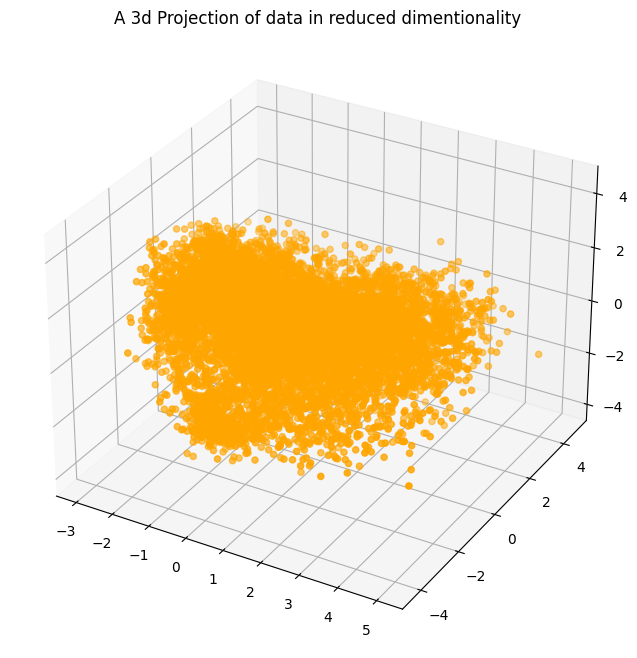

In [109]:
## #d projection of data

x=pca_df['col1']
y=pca_df['col2']
z=pca_df['col3']

fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z,c='orange',marker='o')
ax.set_title('A 3d Projection of data in reduced dimentionality')
plt.show()


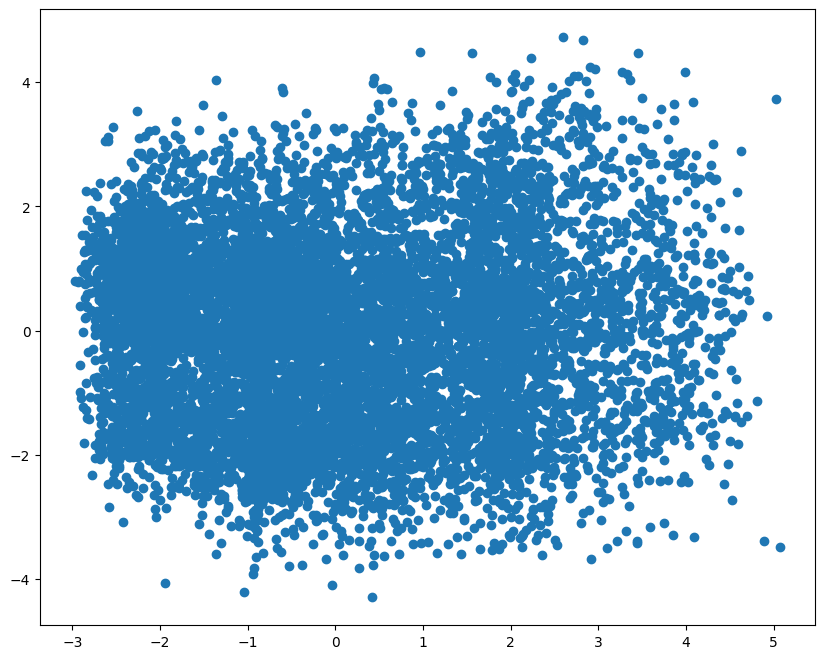

In [110]:
## 2d scatter plot of data

plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.show()

In [111]:
## Elbow method to select k value

wcss =[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

In [112]:
wcss

[70766.08831023563,
 47572.04916548851,
 36999.29162871838,
 30151.946549131422,
 25097.214080918613,
 21795.020520938688,
 19967.20904996728,
 18439.240163451694,
 17015.232141841978,
 15890.291243397969]

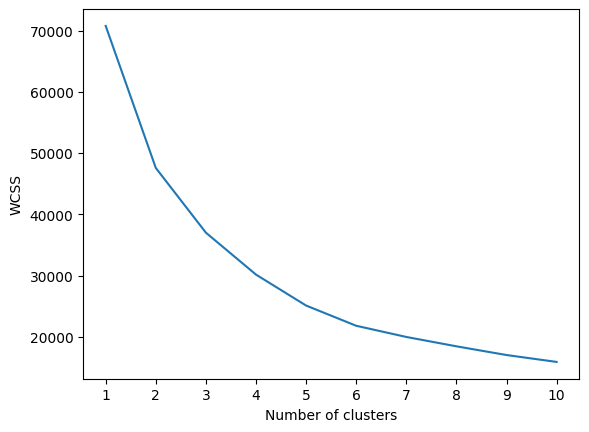

In [113]:
## plot elbow curve

plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [114]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.knee

4

In [115]:
## silhouette score

silhouette_coefficient = []
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(pca_df)
    score=silhouette_score(pca_df,kmeans.labels_)
    silhouette_coefficient.append(score)

In [116]:
silhouette_coefficient

[0.3186038350259935,
 0.29532311481834334,
 0.3001070036705054,
 0.28695752085351317,
 0.2856657581845094,
 0.277645417485882,
 0.2830061531021191,
 0.2831547662420097,
 0.27880419040365223]

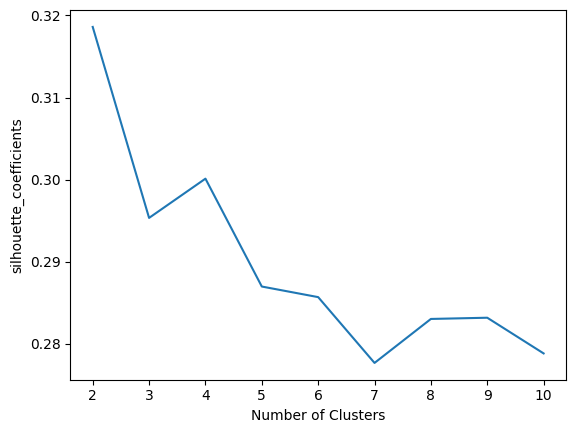

In [117]:
## plotting silhoutte score

plt.plot(range(2,11),silhouette_coefficient)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette_coefficients")
plt.show()

In [118]:
## we will go with 4 clusters 

In [119]:
kmeans=KMeans(n_clusters=4,init='k-means++')

In [120]:
## fit model and predict clusters

In [121]:
clusters=kmeans.fit_predict(pca_df)

In [122]:

pca_df['Clusters']=clusters

In [123]:
data['Clusters']=clusters
df['Clusters']=clusters

In [124]:
pca_df.head()

,col1,col2,col3,Clusters
0,2.233423,-1.515215,0.834964,1
1,-0.024448,-1.331762,0.040462,0
2,0.987422,-1.978843,0.242006,2
3,-2.360547,-1.075102,0.748319,0
4,0.943872,-1.859742,-0.851833,2


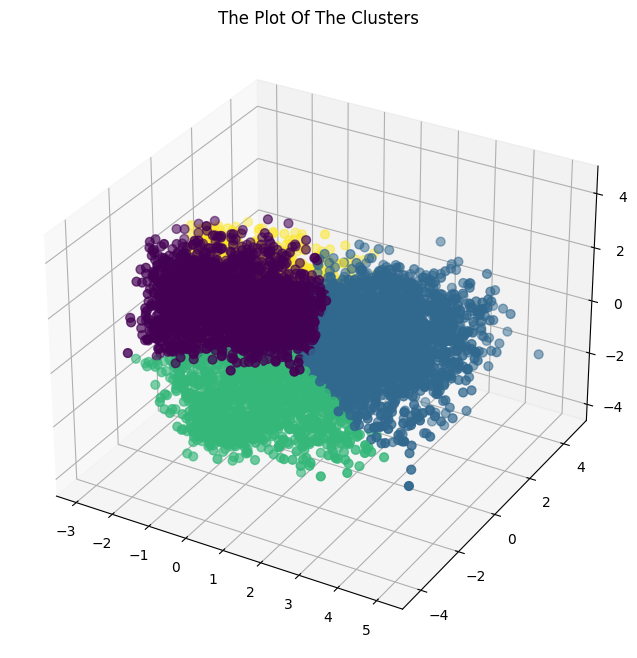

In [125]:
## Lets examine cluster formed with 3d visualization

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=pca_df["Clusters"], marker='o' )
ax.set_title("The Plot Of The Clusters")
plt.show()

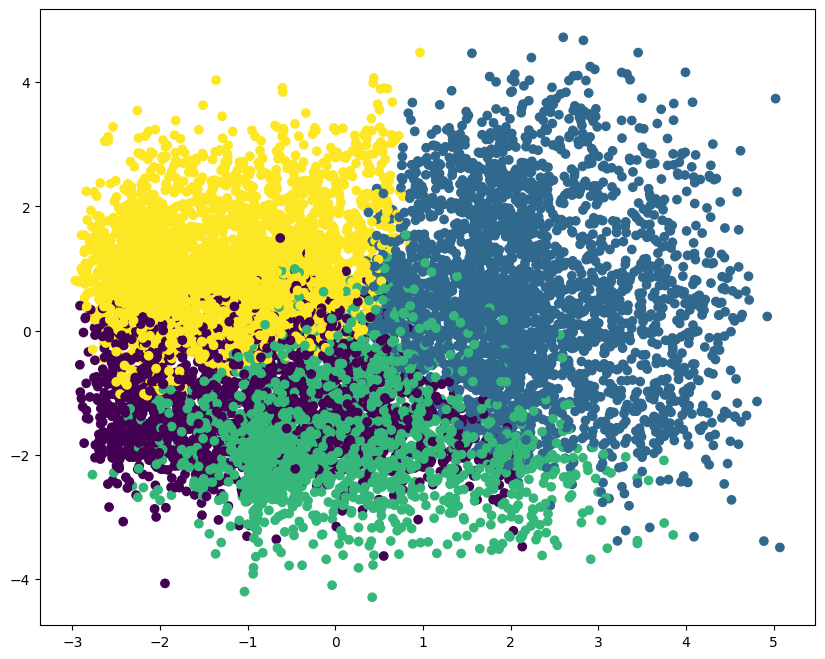

In [126]:
## 2d visualization 

plt.figure(figsize=(10,8))
plt.scatter(x,y,c=pca_df['Clusters'])
plt.show()


Text(0.5, 1.0, 'Distribution of the clusters')

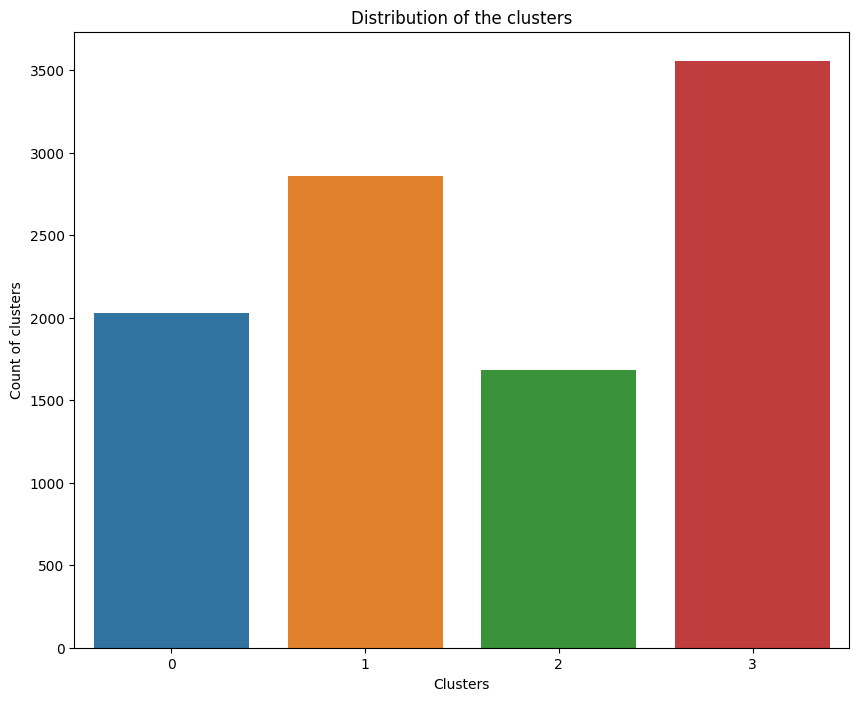

In [127]:
## Let's Evaluate cluster

plt.figure(figsize=(10,8))
sns.countplot(x=data['Clusters'])
plt.xlabel('Clusters')
plt.ylabel('Count of clusters')
plt.title('Distribution of the clusters')

### Clusters seems to be fairly distributes 

In [128]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Clusters
0,-0.164947,0.503368,0.475584,0.763943,-1.490798,0.569467,1.251665,-0.473422,1.302327,-1.501375,-0.974223,-0.775882,0.437506,1.059956,-0.893680,0.853099,0.597300,-0.250587,1
1,0.334518,2.043199,1.278655,1.407306,-1.490798,-0.544797,0.368575,-0.366667,0.415134,-1.410604,-1.358042,-0.616276,0.437506,-0.943436,0.593388,-0.735306,-0.887628,-0.250587,0
2,0.584250,0.503368,-0.006258,0.120579,-1.490798,-0.037453,-0.594761,-1.426858,-0.364544,-1.042579,-1.912446,-0.997155,0.437506,1.059956,0.593388,0.853099,1.339764,-0.250587,2
3,-0.789277,1.273283,-0.327486,-0.522785,2.069070,-1.659061,-0.615668,1.661686,-0.878966,-1.484703,-1.912446,1.759686,0.437506,-0.943436,-0.893680,0.853099,-0.887628,-0.250587,0
4,-0.789277,0.503368,-2.415470,0.763943,-1.490798,-0.037453,-0.336305,-1.426858,-0.109883,-1.703913,-1.571274,-0.997155,0.437506,1.059956,-1.637214,0.853099,0.597300,-0.250587,2


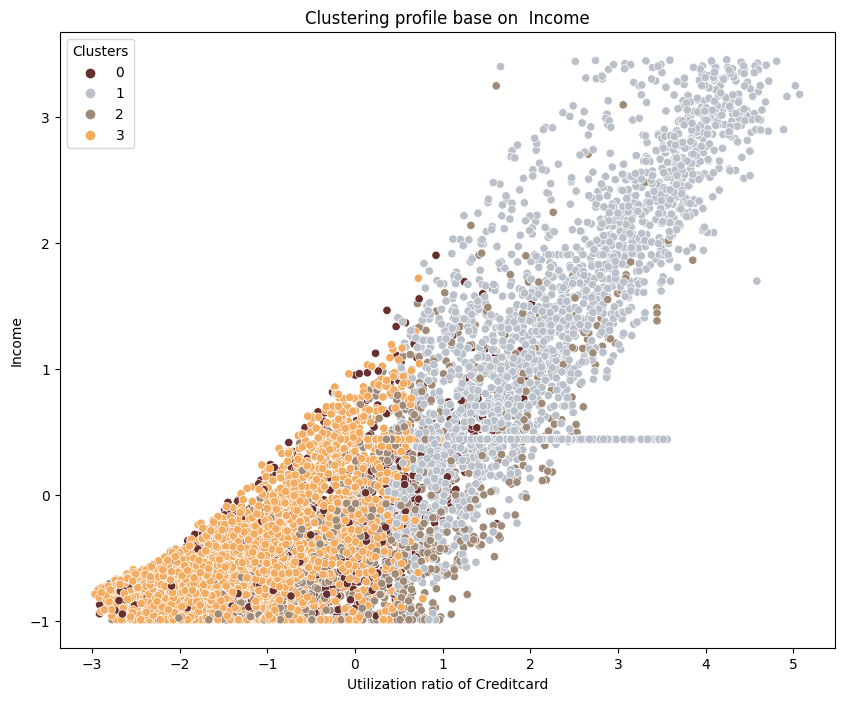

In [129]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_df['col1'],y=data['Income_Category'],hue=data['Clusters'],palette=pal)
plt.xlabel('Utilization ratio of Creditcard')
plt.ylabel('Income')
plt.title('Clustering profile base on  Income')
plt.show()

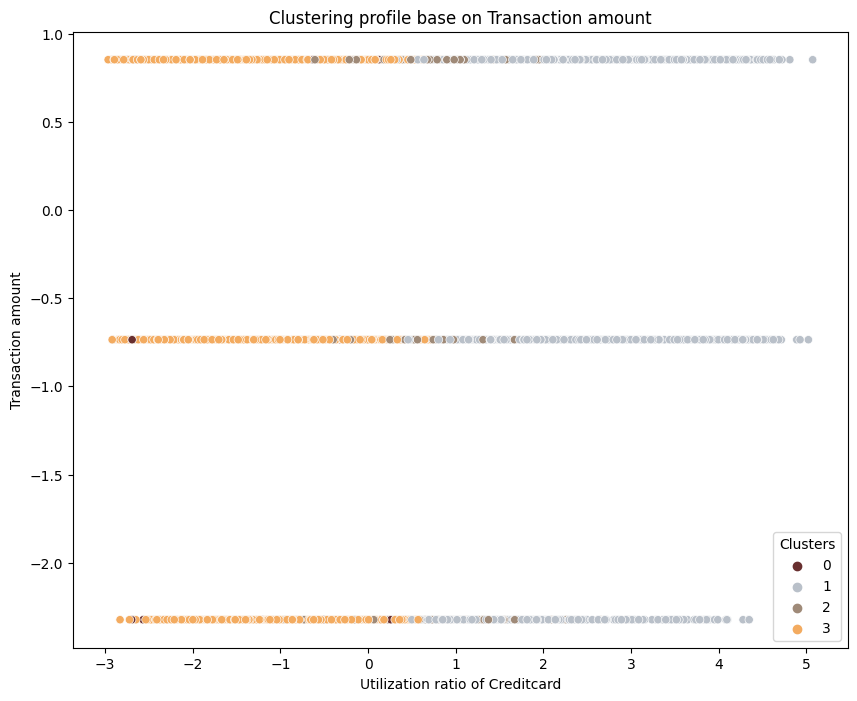

In [130]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_df['col1'],y=data['Total_Trans_Amt'],hue=data['Clusters'],palette=pal)
plt.xlabel('Utilization ratio of Creditcard')
plt.ylabel('Transaction amount')
plt.title('Clustering profile base on Transaction amount')
plt.show()

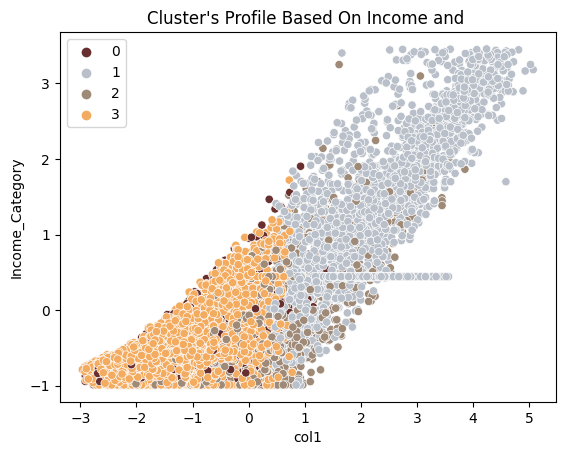

In [131]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.scatterplot(x=pca_df['col1'], y=data['Income_Category'],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income and ")
plt.legend()
plt.show()

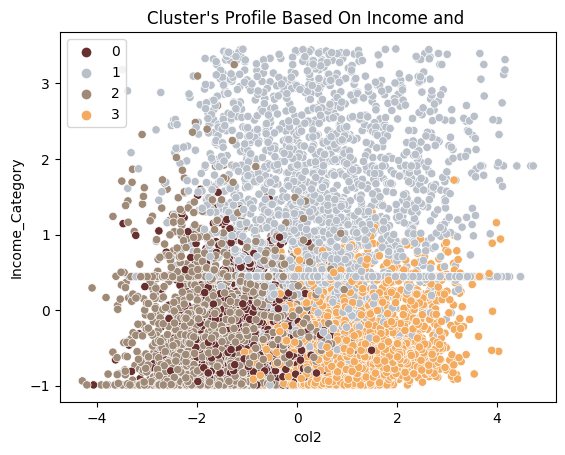

In [132]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.scatterplot(x=pca_df['col2'], y=data['Income_Category'],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income and ")
plt.legend()
plt.show()

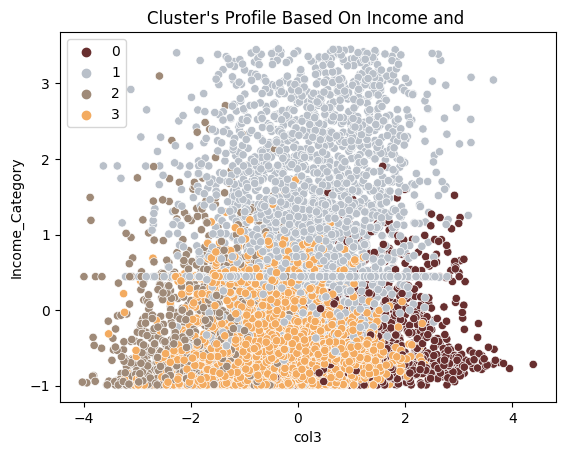

In [133]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.scatterplot(x=pca_df['col3'], y=data['Income_Category'],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income and ")
plt.legend()
plt.show()

# Profiling

Now that we have formed the clusters and looked at their purchasing habits. Let us see who all are four in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. On the basis of the outcomes, I will be arriving at the conclusions.

In [134]:
features = ['Customer_Age','Education_Level','Income_Category','Card_Category','Credit_Limit','Total_Trans_Amt']

<Figure size 640x480 with 0 Axes>

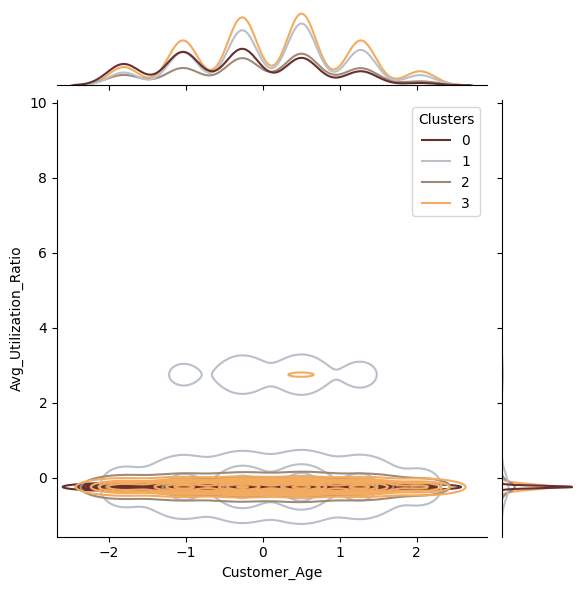

<Figure size 640x480 with 0 Axes>

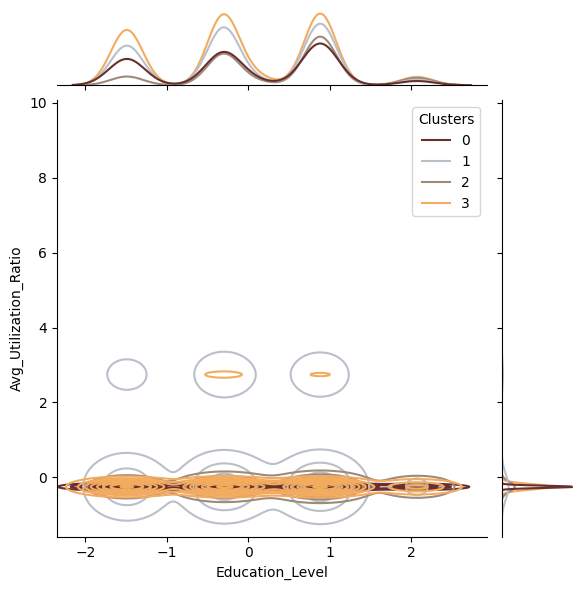

<Figure size 640x480 with 0 Axes>

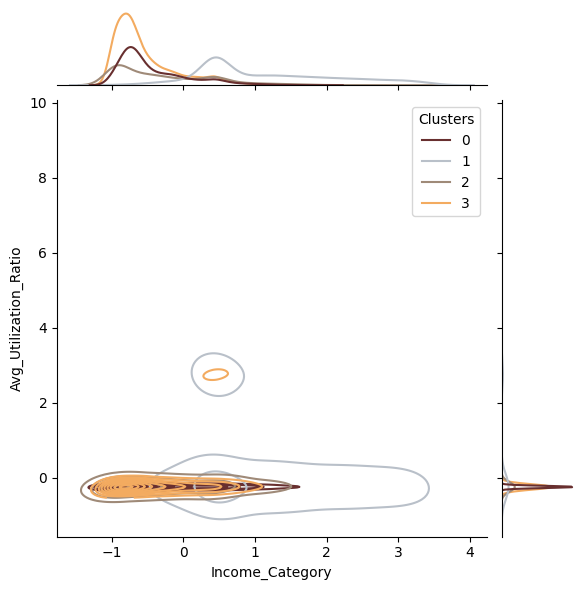

<Figure size 640x480 with 0 Axes>

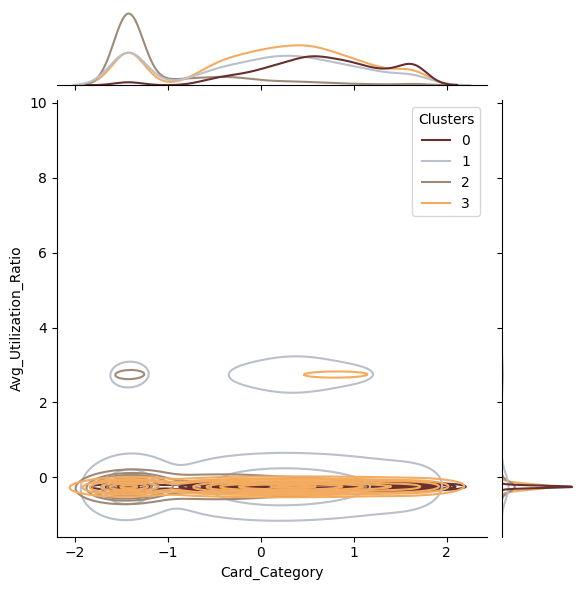

<Figure size 640x480 with 0 Axes>

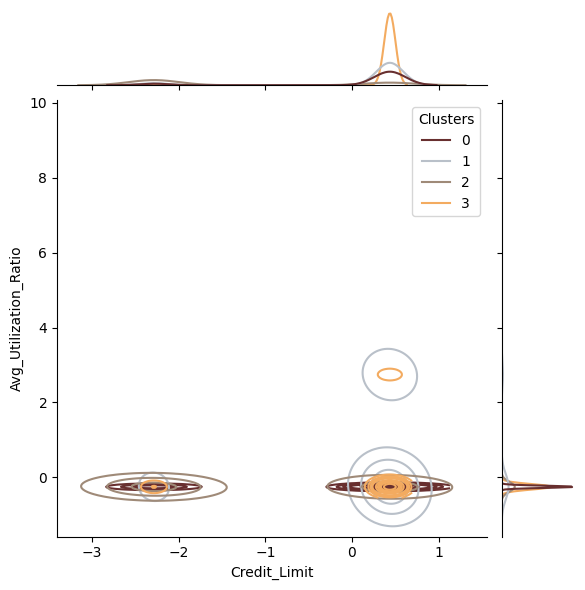

<Figure size 640x480 with 0 Axes>

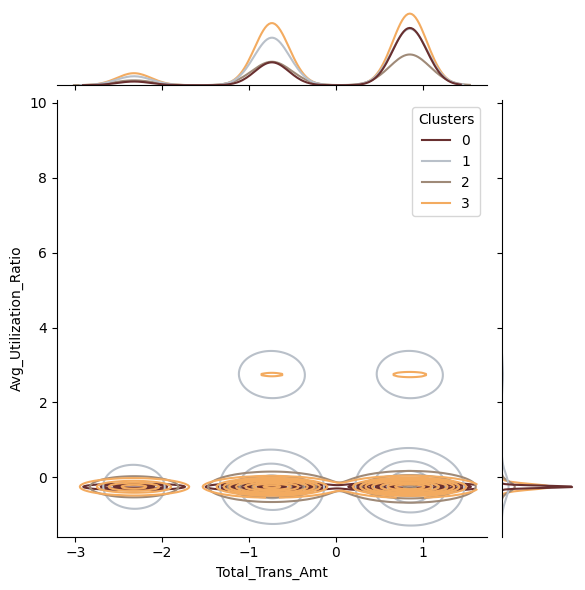

In [135]:
for i in features:
    plt.figure()
    sns.jointplot(x=data[i],y=data['Avg_Utilization_Ratio'],hue=data['Clusters'],kind='kde',palette=pal)
    plt.show()

In [136]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Clusters
0,-0.164947,0.503368,0.475584,0.763943,-1.490798,0.569467,1.251665,-0.473422,1.302327,-1.501375,-0.974223,-0.775882,0.437506,1.059956,-0.893680,0.853099,0.597300,-0.250587,1
1,0.334518,2.043199,1.278655,1.407306,-1.490798,-0.544797,0.368575,-0.366667,0.415134,-1.410604,-1.358042,-0.616276,0.437506,-0.943436,0.593388,-0.735306,-0.887628,-0.250587,0
2,0.584250,0.503368,-0.006258,0.120579,-1.490798,-0.037453,-0.594761,-1.426858,-0.364544,-1.042579,-1.912446,-0.997155,0.437506,1.059956,0.593388,0.853099,1.339764,-0.250587,2
3,-0.789277,1.273283,-0.327486,-0.522785,2.069070,-1.659061,-0.615668,1.661686,-0.878966,-1.484703,-1.912446,1.759686,0.437506,-0.943436,-0.893680,0.853099,-0.887628,-0.250587,0
4,-0.789277,0.503368,-2.415470,0.763943,-1.490798,-0.037453,-0.336305,-1.426858,-0.109883,-1.703913,-1.571274,-0.997155,0.437506,1.059956,-1.637214,0.853099,0.597300,-0.250587,2


# Profiling the clusters

1. About cluster no : 0
-  All age group available
-  have very good education level
-  good income category
-  card usage all type
-  credit limit maximum utilized
-  maximum transaction amount utilized

2. About cluster no : 1
-  All age group available
-  have very good education level
-  fair income category
-  card usege all type 
-  credit limit utilize max
-  max transaction amout utilized

3. About cluster no : 2
-  All age group avalable
-  medium education level
-  less income category
-  card usage Blue max low impact
-  credit limit usage medium
-  max transaction amount utilized

4. About cluster no : 3
-  All age group available
-  have very good education level
-  fair income category
-  good category card usage
-  max credit limit utilized
-  max transaction amt utilized


# Testing 

In [137]:

## dependent and independent variable 

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

## train test split 

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size= 0.33,random_state=42)

In [138]:
classifier = DecisionTreeClassifier()
classifier1 = SVC()

In [139]:
classifier.fit(X_train,y_train)
classifier1.fit(X_train, y_train)

SVC()

In [140]:
y_pred = classifier.predict(X_test)
y_pred1 = classifier1.predict(X_test)

In [141]:
## Accuracy score of desicion tree classifier

print("Below is accuracy score of decision tree classifier ")

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Below is accuracy score of decision tree classifier 
0.8686415320167564
[[ 560   28   40   64]
 [  23  848   35   12]
 [  36   32  452   30]
 [  79   23   37 1043]]


In [142]:
## Accuracy score of SVC

print("Below is accuracy score of support vector classifier ")

print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

Below is accuracy score of support vector classifier 
0.9605026929982047
[[ 669    8    3   12]
 [   9  897    9    3]
 [  10   16  498   26]
 [  15   17    4 1146]]


### Observation :

- Decision Tree Accuracy :  0.86
- SVC accuracy :  0.96

By above tests accuracy we can say that our model gives very good accuracy so we can use it for further procedure 

In [143]:
## save clustered data into csv file and

df1 = pd.concat([df,data.iloc[:-1]],axis = 1)

In [144]:
df1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Clusters,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Clusters
0,Existing Customer,45.000000,M,3,High School,Married,$60K - $80K,Blue,39.000000,5,1.000000,3.000000,12691.000000,777,11914.000000,1144.000000,42.000000,0.061000,1,-0.164947,0.503368,0.475584,0.763943,-1.490798,0.569467,1.251665,-0.473422,1.302327,-1.501375,-0.974223,-0.775882,0.437506,1.059956,-0.893680,0.853099,0.597300,-0.250587,1.000000
1,Existing Customer,49.000000,F,5,Graduate,Single,Less than $40K,Blue,44.000000,6,1.000000,2.000000,8256.000000,864,7392.000000,1291.000000,33.000000,0.105000,0,0.334518,2.043199,1.278655,1.407306,-1.490798,-0.544797,0.368575,-0.366667,0.415134,-1.410604,-1.358042,-0.616276,0.437506,-0.943436,0.593388,-0.735306,-0.887628,-0.250587,0.000000
2,Existing Customer,51.000000,M,3,Graduate,Married,$80K - $120K,Blue,36.000000,4,1.000000,2.455317,3418.000000,0,3418.000000,1887.000000,20.000000,0.000000,2,0.584250,0.503368,-0.006258,0.120579,-1.490798,-0.037453,-0.594761,-1.426858,-0.364544,-1.042579,-1.912446,-0.997155,0.437506,1.059956,0.593388,0.853099,1.339764,-0.250587,2.000000
3,Existing Customer,40.000000,F,4,High School,Married,Less than $40K,Blue,34.000000,3,4.000000,1.000000,3313.000000,2517,796.000000,1171.000000,20.000000,0.760000,0,-0.789277,1.273283,-0.327486,-0.522785,2.069070,-1.659061,-0.615668,1.661686,-0.878966,-1.484703,-1.912446,1.759686,0.437506,-0.943436,-0.893680,0.853099,-0.887628,-0.250587,0.000000
4,Existing Customer,40.000000,M,3,Uneducated,Married,$60K - $80K,Blue,21.000000,5,1.000000,2.455317,4716.000000,0,4716.000000,816.000000,28.000000,0.000000,2,-0.789277,0.503368,-2.415470,0.763943,-1.490798,-0.037453,-0.336305,-1.426858,-0.109883,-1.703913,-1.571274,-0.997155,0.437506,1.059956,-1.637214,0.853099,0.597300,-0.250587,2.000000


In [145]:
df1.to_csv("data/Clustered_data.csv",index=False)

# Conclusion : 

#### After getting cluster profiling detail and testing the same we get conclusion as below : 

-  Excellent Customers : cluster no 0
-  Very Good Customers : cluster no 3
-  Good Customers : cluster no 1
-  Fair Customers : cluster no 2

In [146]:
wcss =[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

In [147]:
wcss

[195694.18781475304,
 168970.25217208994,
 152436.6702225496,
 140901.35827179524,
 133369.27843160953,
 128200.6360136151,
 124328.16136739962,
 120939.0662728129,
 118138.6324149323,
 115758.81183468537]

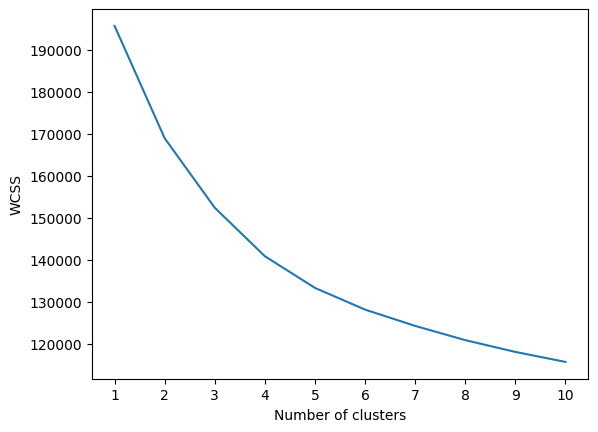

In [148]:
## plot elbow curve

plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [149]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.knee

4

In [150]:
## silhouette score

silhouette_coefficient = []
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(pca_df)
    score=silhouette_score(pca_df,kmeans.labels_)
    silhouette_coefficient.append(score)

In [151]:
silhouette_coefficient

[0.3104345366134733,
 0.3562286934002254,
 0.4073442002849076,
 0.3790113518401139,
 0.32778109273009093,
 0.3174516500130907,
 0.2940743563815438,
 0.29252237096646133,
 0.2867062256741504]

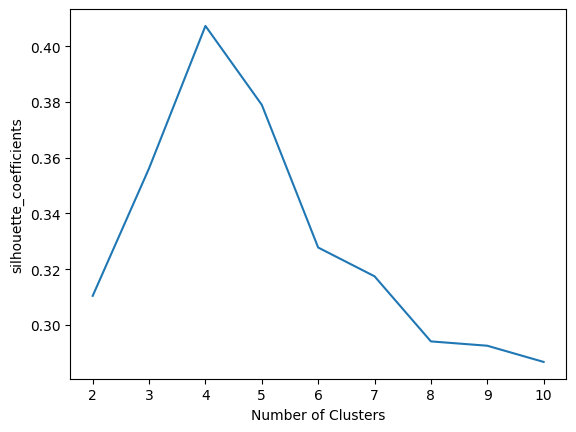

In [152]:
## plotting silhoutte score

plt.plot(range(2,11),silhouette_coefficient)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette_coefficients")
plt.show()

In [187]:
kmeans=KMeans(n_clusters=4,init='k-means++')

In [188]:
clusters=kmeans.fit_predict(data)


In [189]:
clusters=kmeans.fit_predict(pca_df)
data['Clusters']=clusters

In [190]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Clusters
0,-0.164947,0.503368,0.475584,0.763943,-1.490798,0.569467,1.251665,-0.473422,1.302327,-1.501375,-0.974223,-0.775882,0.437506,1.059956,-0.893680,0.853099,0.597300,-0.250587,1
1,0.334518,2.043199,1.278655,1.407306,-1.490798,-0.544797,0.368575,-0.366667,0.415134,-1.410604,-1.358042,-0.616276,0.437506,-0.943436,0.593388,-0.735306,-0.887628,-0.250587,0
2,0.584250,0.503368,-0.006258,0.120579,-1.490798,-0.037453,-0.594761,-1.426858,-0.364544,-1.042579,-1.912446,-0.997155,0.437506,1.059956,0.593388,0.853099,1.339764,-0.250587,2
3,-0.789277,1.273283,-0.327486,-0.522785,2.069070,-1.659061,-0.615668,1.661686,-0.878966,-1.484703,-1.912446,1.759686,0.437506,-0.943436,-0.893680,0.853099,-0.887628,-0.250587,0
4,-0.789277,0.503368,-2.415470,0.763943,-1.490798,-0.037453,-0.336305,-1.426858,-0.109883,-1.703913,-1.571274,-0.997155,0.437506,1.059956,-1.637214,0.853099,0.597300,-0.250587,2


In [191]:
# for i in data.columns[:-1]:
#     sns.histogram(x=data['Clusters'],y=data[i])
#     plt.show()

In [192]:
c_g=data.groupby('Clusters')

In [193]:
c_g.first()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
Clusters,,,,,,,,,,,,,,,,,,
0,0.334518,2.043199,1.278655,1.407306,-1.490798,-0.544797,0.368575,-0.366667,0.415134,-1.410604,-1.358042,-0.616276,0.437506,-0.943436,0.593388,-0.735306,-0.887628,-0.250587
1,-0.164947,0.503368,0.475584,0.763943,-1.490798,0.569467,1.251665,-0.473422,1.302327,-1.501375,-0.974223,-0.775882,0.437506,1.059956,-0.893680,0.853099,0.597300,-0.250587
2,0.584250,0.503368,-0.006258,0.120579,-1.490798,-0.037453,-0.594761,-1.426858,-0.364544,-1.042579,-1.912446,-0.997155,0.437506,1.059956,0.593388,0.853099,1.339764,-0.250587
3,-1.163875,0.503368,-1.130557,0.120579,2.069070,-0.544797,0.126048,0.783101,-0.007665,-0.763472,-0.334526,-0.068535,0.437506,-0.943436,-1.637214,-0.735306,-0.887628,-0.250587


<Axes: xlabel='Clusters'>

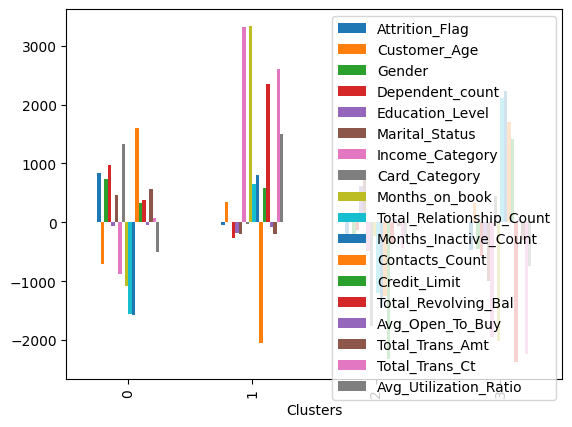

In [194]:
c_g.sum().plot(kind="bar")

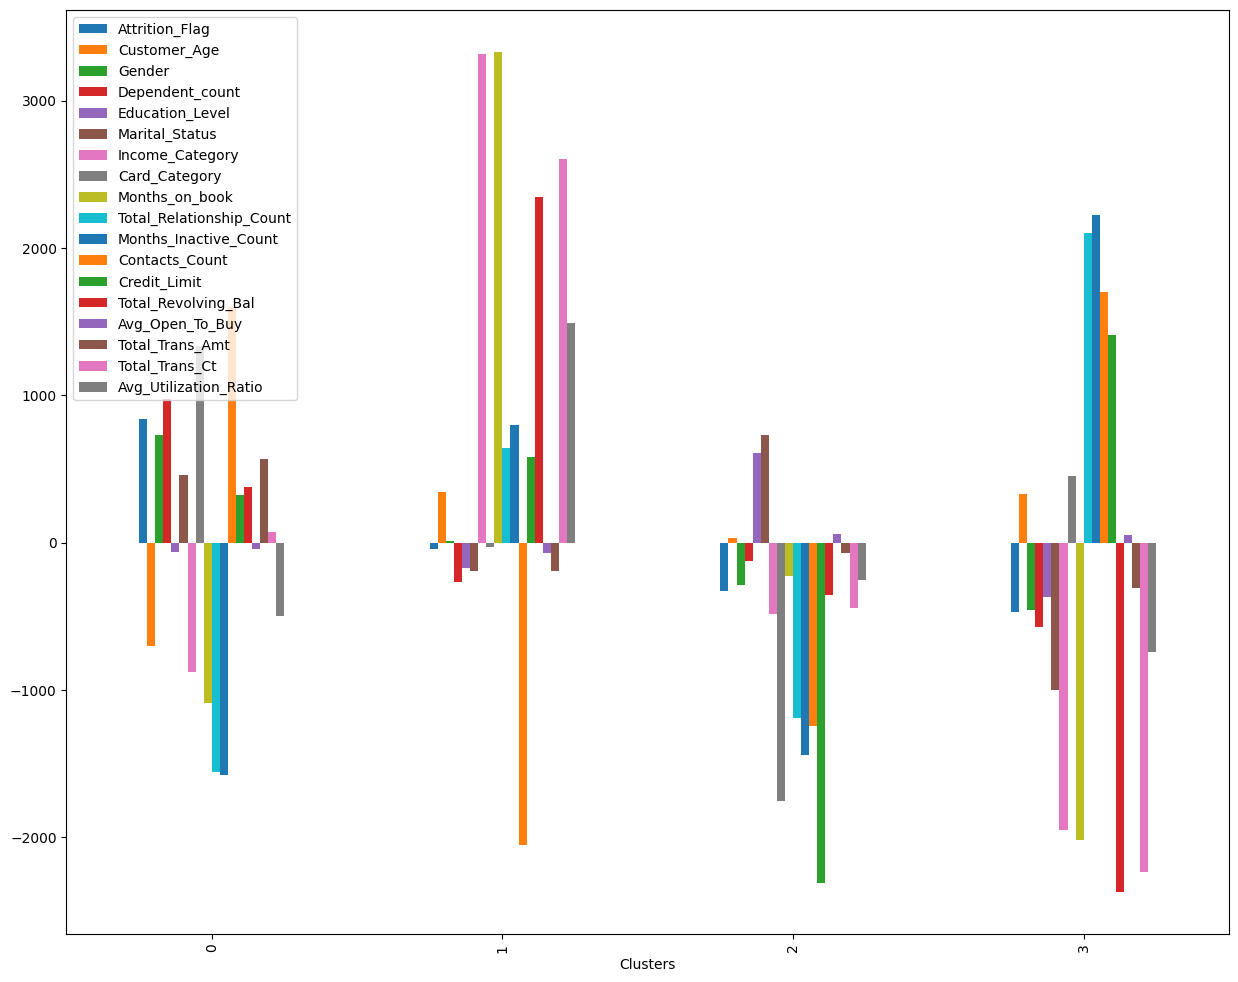

In [195]:

c_g.sum().plot(kind="bar",figsize=(15,12))
plt.show()

In [196]:
c_g.sum()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
Clusters,,,,,,,,,,,,,,,,,,
0,839.266128,-700.166895,728.347708,973.867431,-62.707723,458.173240,-878.439739,1331.834566,-1086.478447,-1554.646085,-1574.732901,1599.282105,325.411111,380.478973,-41.727996,567.254561,74.901777,-495.704135
1,-41.998524,340.697202,13.080807,-270.722265,-173.378321,-189.997929,3316.925380,-31.723568,3331.867366,645.485658,795.980036,-2055.306355,579.078179,2347.373268,-73.414501,-194.447242,2605.028926,1491.192203
2,-326.842617,28.482075,-284.803285,-126.990386,608.847215,732.999676,-483.964584,-1753.297713,-226.566420,-1193.856446,-1444.119462,-1247.828697,-2313.209567,-356.660041,60.182208,-67.600592,-441.952148,-254.206672
3,-470.424987,330.987618,-456.625230,-576.154779,-372.761171,-1001.174986,-1954.521057,453.186715,-2018.822499,2103.016872,2222.872327,1703.852947,1408.720278,-2371.192200,54.960289,-305.206728,-2237.978554,-741.281396


In [197]:
c_g.sum().T

Clusters,0,1,2,3
Attrition_Flag,839.266128,-41.998524,-326.842617,-470.424987
Customer_Age,-700.166895,340.697202,28.482075,330.987618
Gender,728.347708,13.080807,-284.803285,-456.625230
Dependent_count,973.867431,-270.722265,-126.990386,-576.154779
Education_Level,-62.707723,-173.378321,608.847215,-372.761171
Marital_Status,458.173240,-189.997929,732.999676,-1001.174986
Income_Category,-878.439739,3316.925380,-483.964584,-1954.521057
Card_Category,1331.834566,-31.723568,-1753.297713,453.186715
Months_on_book,-1086.478447,3331.867366,-226.566420,-2018.822499
Total_Relationship_Count,-1554.646085,645.485658,-1193.856446,2103.016872


In [198]:
final_df=c_g.mean()

In [199]:
final_df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
Clusters,,,,,,,,,,,,,,,,,,
0,0.414248,-0.345591,0.359500,0.480685,-0.030951,0.226147,-0.433583,0.657371,-0.536268,-0.767348,-0.777262,0.789379,0.160618,0.187798,-0.020596,0.279987,0.036970,-0.244671
1,-0.014680,0.119083,0.004572,-0.094625,-0.060601,-0.066410,1.159359,-0.011088,1.164581,0.225615,0.278217,-0.718387,0.202404,0.820473,-0.025660,-0.067965,0.910531,0.521214
2,-0.194087,0.016913,-0.169123,-0.075410,0.361548,0.435273,-0.287390,-1.041151,-0.134541,-0.708941,-0.857553,-0.740991,-1.373640,-0.211793,0.035738,-0.040143,-0.262442,-0.150954
3,-0.132290,0.093079,-0.128410,-0.162023,-0.104826,-0.281545,-0.549640,0.127443,-0.567723,0.591400,0.625105,0.479149,0.396153,-0.666814,0.015456,-0.085829,-0.629353,-0.208459


In [200]:
final_df.T

Clusters,0,1,2,3
Attrition_Flag,0.414248,-0.014680,-0.194087,-0.132290
Customer_Age,-0.345591,0.119083,0.016913,0.093079
Gender,0.359500,0.004572,-0.169123,-0.128410
Dependent_count,0.480685,-0.094625,-0.075410,-0.162023
Education_Level,-0.030951,-0.060601,0.361548,-0.104826
Marital_Status,0.226147,-0.066410,0.435273,-0.281545
Income_Category,-0.433583,1.159359,-0.287390,-0.549640
Card_Category,0.657371,-0.011088,-1.041151,0.127443
Months_on_book,-0.536268,1.164581,-0.134541,-0.567723
Total_Relationship_Count,-0.767348,0.225615,-0.708941,0.591400


In [205]:
features = ['Customer_Age','Education_Level','Income_Category','Card_Category','Credit_Limit','Months_Inactive_Count','Avg_Open_To_Buy','Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct']

<Axes: xlabel='Clusters'>

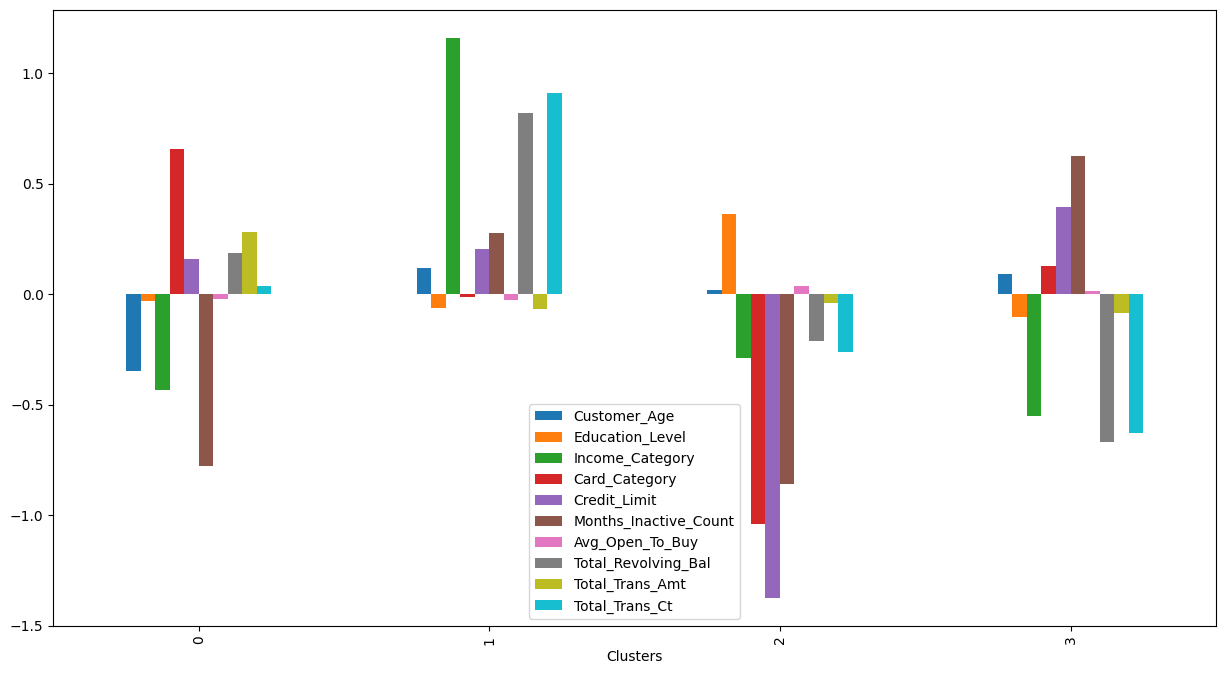

In [206]:
final_df[features].plot(kind="bar",figsize=(15,8))

# Profiling the cluster

## Cluster : 0 

-  We can see in cluster one customers is less aged , medium educational background and income , high credit limit and high category card usage and less inactive months , average opening is fair , income category is fair but used highest transaction amount even after less utilization ratio. 

## Cluster : 1

- We can see in cluster 1 high income high transaction high card limit and less education level and also medium card category, but less transaction amount .

## Cluster : 2

- We can see in cluster 2 card high educated but all parameters are lower .

## Cluster : 3

- We can see in cluster 3 that high credit limit and medium card category but that after having less transactions and also utilization ratio less , and used less amounts.

# Conclusion : 

Excellent customer  : Cluster 0

Good customer : Cluster 1

Fair customer : Cluster 3

Worst customer : Cluster 2